In [1]:
!pip install simpleaudio  

In [2]:
import numpy as np  
import simpleaudio as sa
from itertools import repeat

In [3]:
sargamdict = {"sa":261,  
             "re":294,  
             "ga":330,  
             "ma":349,  
             "pa":392,  
             "dha":440,  
             "ni":494,  
             "sa":515}

In [7]:
def play_audio(audio):# normalize to 16-bit range  
    audio *= 32767 / np.max(np.abs(audio))  
    # convert to 16-bit data  
    audio = audio.astype(np.int16)  
  
    # start playback  
    play_obj = sa.play_buffer(audio, 1, 2, sample_rate)  
  
    # wait for playback to finish before exiting  
    play_obj.wait_done()  

In [10]:
T = 0.25  
sample_rate = 44100
TxS = int(T * sample_rate)
t = np.linspace(0, T, TxS, endpoint=False)  

In [12]:
Sa_note = np.sin(sargamdict["sa"] * t * 3 * np.pi)  
Re_note = np.sin(sargamdict["re"] * t * 3 * np.pi)  
Ga_note = np.sin(sargamdict["ga"] * t * 3* np.pi)  
Ma_note = np.sin(sargamdict["ma"] * t * 3 * np.pi)  
Pa_note = np.sin(sargamdict["pa"] * t * 3 * np.pi)  
Dha_note = np.sin(sargamdict["dha"] * t * 3 * np.pi)  
Ni_note = np.sin(sargamdict["ni"] * t * 3 * np.pi)  
# Sa1_note = np.sin(sargamdict["sa1"] * t * 3 * np.pi)

In [13]:
get_pause  = lambda seconds: repeat(0, int(seconds * sample_rate))  
pause_note=list(get_pause(0.01)) 

In [15]:
sargam = np.hstack((Sa_note,pause_note,Re_note,pause_note,Ga_note,  
                   pause_note,Ma_note, pause_note,Pa_note, pause_note,  
                    Dha_note, pause_note,Ni_note, pause_note))  

In [18]:
# play_audio(sargam)  
play_audio(sargam[::-1])  

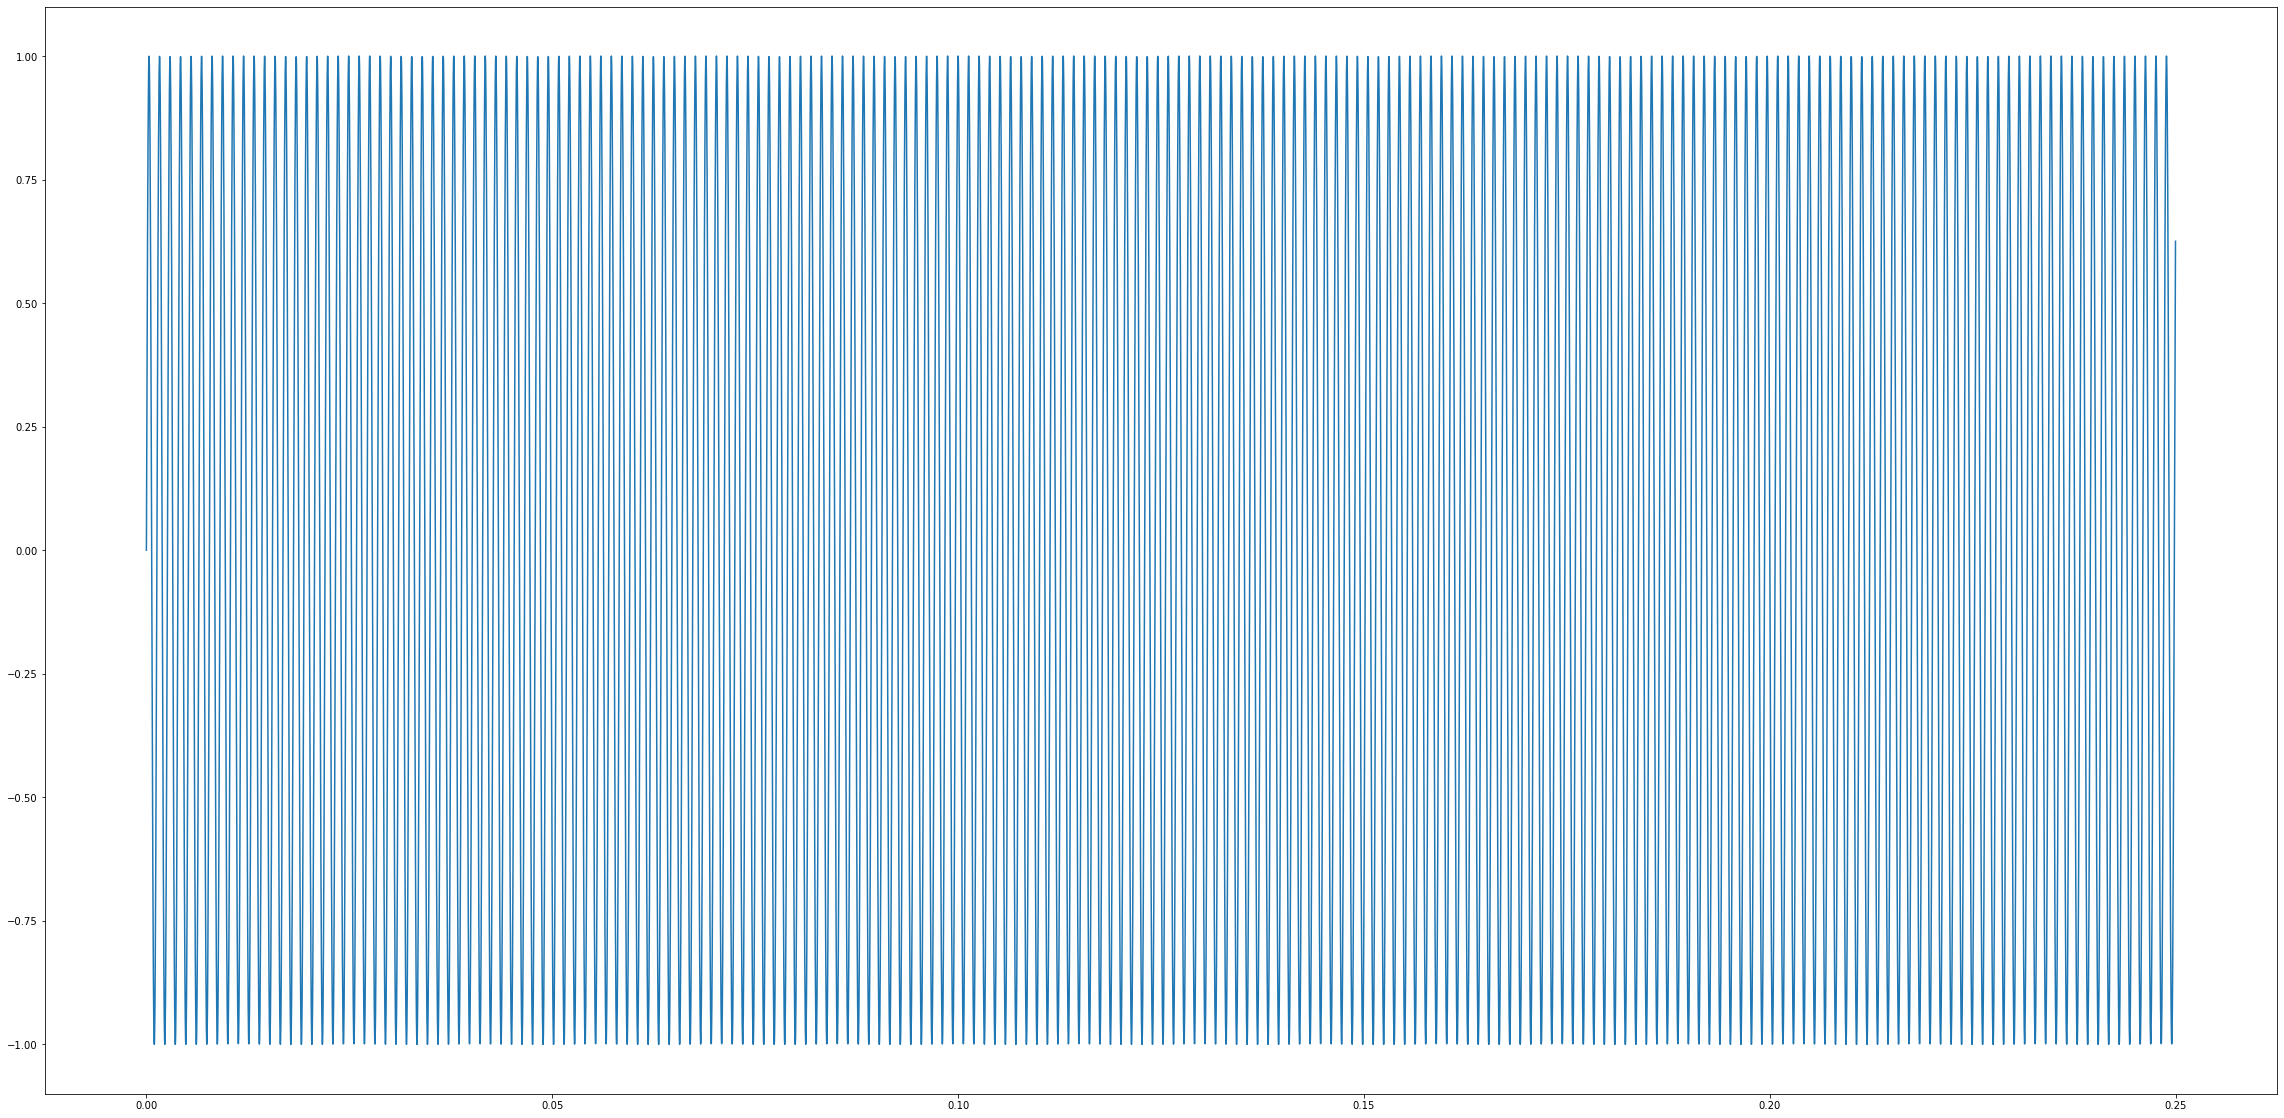

In [19]:
import matplotlib.pyplot as plt  
%matplotlib inline  
plt.figure(figsize=(40,20))  
plt.plot(t, Sa_note); 

In [20]:
# !pip install wavio 

import wavio  
fs = 44100   
s2 = np.append(sargam,sargam[::-1])  
wavio.write("pythonsargam.wav", s2, fs, scale=None, sampwidth=2)  

In [21]:
sargam

array([   0.        , 3599.14438581, 7154.73353805, ...,    0.        ,
          0.        ,    0.        ])

In [22]:
type(sargam)

numpy.ndarray

In [23]:
len(sargam)

80262

In [33]:
# !pip install pyaudio
# import pyaudio

160
154350


<ipython-input-34-5ea49e3424c8>:19: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  k = arange(n)
<ipython-input-34-5ea49e3424c8>:25: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  x = fft(x) / n  # fft computing and normalization
<ipython-input-34-5ea49e3424c8>:19: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  k = arange(n)
<ipython-input-34-5ea49e3424c8>:25: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  x = fft(x) / n  # fft computing and normalization


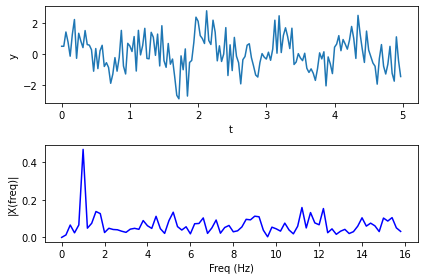

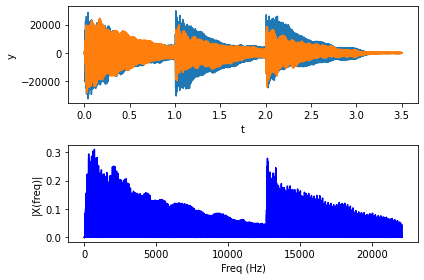

In [34]:
from scipy import fft, arange
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os


def frequency_sepectrum(x, sf):
    """
    Derive frequency spectrum of a signal from time domain
    :param x: signal in the time domain
    :param sf: sampling frequency
    :returns frequencies and their content distribution
    """
    x = x - np.average(x)  # zero-centering

    n = len(x)
    print(n)
    k = arange(n)
    tarr = n / float(sf)
    frqarr = k / float(tarr)  # two sides frequency range

    frqarr = frqarr[range(n // 2)]  # one side frequency range

    x = fft(x) / n  # fft computing and normalization
    x = x[range(n // 2)]

    return frqarr, abs(x)


# Sine sample with a frequency of 1hz and add some noise
sr = 32  # sampling rate
y = np.linspace(0, 2*np.pi, sr)
y = np.tile(np.sin(y), 5)
y += np.random.normal(0, 1, y.shape)
t = np.arange(len(y)) / float(sr)

plt.subplot(2, 1, 1)
plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('y')

frq, X = frequency_sepectrum(y, sr)

plt.subplot(2, 1, 2)
plt.plot(frq, X, 'b')
plt.xlabel('Freq (Hz)')
plt.ylabel('|X(freq)|')
plt.tight_layout()


# wav sample from https://freewavesamples.com/files/Alesis-Sanctuary-QCard-Crickets.wav
# here_path = os.path.dirname(os.path.realpath(__file__))
# wav_file_name = 'Alesis-Sanctuary-QCard-Crickets.wav'
# wave_file_path = os.path.join(here_path, wav_file_name)

wave_file_path = 'notes_2_16_44.wav'
sr, signal = wavfile.read(wave_file_path)

y = signal[:]  # use the first channel (or take their average, alternatively)
t = np.arange(len(y)) / float(sr)

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('y')

frq, X = frequency_sepectrum(y, sr)

plt.subplot(2, 1, 2)
plt.plot(frq, X, 'b')
plt.xlabel('Freq (Hz)')
plt.ylabel('|X(freq)|')
plt.tight_layout()

plt.show()


In [35]:
X

array([[9.40374113e-06, 0.00000000e+00],
       [9.40374113e-06, 0.00000000e+00],
       [2.92495915e-06, 6.47878199e-06],
       ...,
       [5.54228356e-03, 9.32944606e-04],
       [2.06965641e-03, 3.88726919e-04],
       [1.66860079e-03, 2.05377389e-03]])

In [37]:
frq

array([0.00000000e+00, 2.85714286e-01, 5.71428571e-01, ...,
       2.20491429e+04, 2.20494286e+04, 2.20497143e+04])

In [6]:
############################### Declarations ##############################################

# !pip install SpeechRecognition

import os
from pydub import AudioSegment
import speech_recognition as sr



#Read main audio file to be processed. Assuming in the same folder as this script
sound = AudioSegment.from_wav("mp3/MohaliiseducationhubofnorthIndiaPrincipalSecytoPunjabCM.wav")

#slice time are in seconds
tenSecSlice = 10 * 1000 

#Total Audio Length
audioLength = len(sound)

#Get quotient and remainder 
q, r = divmod(audioLength, tenSecSlice)

#Get total segments and rounds to next greater integer 
totalSegments= q + int(bool(r)) 

import os
try:
    os.mkdir('tempDir')
except:
    pass
# exportPath = "\\tempDir\\"

####################################################
#Function for Speech Recognition  
#downloaded & modified  from above mentioned site  
####################################################  


def processAudio(WAV_FILE):
    r = sr.Recognizer()
    with sr.WavFile(WAV_FILE) as source:
        audio = r.record(source) # read the entire WAV file

    # recognize speech using Google Speech Recognition
    try:
        # for testing purposes, we're just using the default API key
        # to use another API key, use `r.recognize_google(audio, key="GOOGLE_SPEECH_RECOGNITION_API_KEY")`
        # instead of `r.recognize_google(audio)`
        print("Google Speech Recognition thinks you said...\n " + r.recognize_google(audio))
    except sr.UnknownValueError:
        print("Google Speech Recognition could not understand audio")
    except sr.RequestError as e:
        print("Could not request results from Google Speech Recognition service; {0}".format(e))

############################### Slice Audio and Process ################################

#Declare empty List

exportPath = "tempDir"
segmentList = []
n=0

#Iterate through slices  and feed to speech recognition function
while n < totalSegments:
    firstPart = (tenSecSlice * n)
    secondPart =  (tenSecSlice * (n + 1))

    print ("Making slice  from %d to %d  (sec)" % (firstPart /1000 , secondPart /1000))
    print ("Recognizing words from  %d to %d " % (firstPart /1000 , secondPart /1000))
    tempObject = sound[ firstPart :secondPart ]
    myAudioFile = exportPath + "/slice" + str(n) +".wav"
    tempObject.export(myAudioFile , format="wav")
    n += 1
    processAudio(myAudioFile)
    print ("")

############################### End Program ##############################################


Making slice  from 0 to 10  (sec)
Recognizing words from  0 to 10 
Google Speech Recognition could not understand audio

Making slice  from 10 to 20  (sec)
Recognizing words from  10 to 20 
Google Speech Recognition could not understand audio

Making slice  from 20 to 30  (sec)
Recognizing words from  20 to 30 
Google Speech Recognition could not understand audio

